<a href="https://colab.research.google.com/github/Kate5-7-2021/Kate_INFO5731_Spring2021/blob/main/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import string
import nltk
import gensim
from scipy.cluster import hierarchy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from textblob import TextBlob
from nltk import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
df=pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
print(df.shape)

(413840, 6)


In [13]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


##**Remove Null Values**

In [14]:
df= df.dropna()                  #there are some null values to be removed
print(df.shape)                  # For this assignment I follow the reference code to practice the model with my dataset.

(334335, 6)


##**Visualize Rating**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


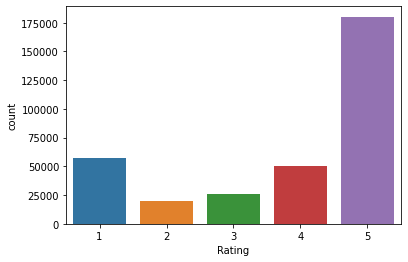

In [15]:
sns.countplot(df.Rating)

##**Convert numerical rate to categorical rate**

In [16]:
def classification(rating):
  if rating<3:
    return 'negative'
  return 'positive'

pos_neg_rating=df['Rating'].map(classification)
df['pos_neg_Rating']=pos_neg_rating
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,pos_neg_Rating
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,positive


In [17]:
df['pos_neg_Rating'].value_counts()

positive    256732
negative     77603
Name: pos_neg_Rating, dtype: int64

##**Data Cleaning**

In [18]:
df.drop_duplicates()


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,pos_neg_Rating
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,positive
...,...,...,...,...,...,...,...
413825,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,"Great phone. Large keys, best flip phone I hav...",0.0,positive
413826,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,"Pros...Works great, very durable, easy to navi...",0.0,positive
413827,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,just as described perfect for the price,0.0,positive
413828,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,Would not work,0.0,negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


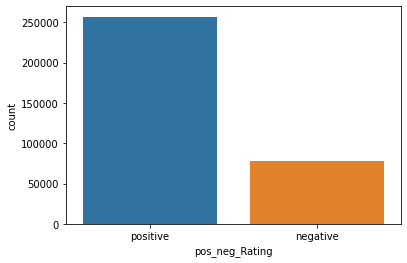

In [19]:
sns.countplot(df.pos_neg_Rating)

###**Text Processing**

In [20]:
#Find sentences with HTML tags

#import re        required library
i=0;
for sent in df['Reviews'].values:
  if (len(re.findall('<.*?>', sent))):
    print(i)
    print(sent)
    break;
  i += 1;

3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [18]:
#sno=nltk.stem.SnowballStemmer('english')    
#stop=set(stopwords.words('english'))

In [21]:
#import nltk                                   required library
#from nltk.corpus import stopwords

#clean all html tags
def cleanhtml(sentence):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr,' ', sentence)
  return cleantext

#df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(lambda x: cleanhtml(x))

In [20]:
'''#clean all punctuations or special characters
def cleanpunc(sentence):
  cleanp = re.sub(r'[?|i|\'|#]',r'',sentence)
  clean_df = re.sub(r'[.|,|)|(|\|/]',r'',cleanp)
  return clean_df
print(stop)
print('************************************************************************') 
print(sno.stem('tasty'))'''

{"won't", 'in', 'should', 'during', 'this', "hadn't", 'again', 'it', 'the', 'my', 'be', 'itself', 'such', 'until', "that'll", 'isn', 'hers', 'been', 'whom', 'being', 'down', 'out', 'under', 'against', 'an', "shouldn't", 'she', 'him', 'on', 'very', 'doesn', 'with', 'while', 'am', 'its', 'above', "isn't", 'once', 'further', 'll', 'have', 'these', "mustn't", 'both', 'shan', 'ma', 'other', 'hasn', 'your', 'for', "hasn't", 'now', 'myself', 'by', 'needn', 'mustn', 'through', 'before', 'after', 'ain', 'himself', 'did', 'those', 'here', 'are', 'ours', 'his', 'do', 'any', 'aren', 'nor', 'that', 'were', 'we', 'a', "should've", 'or', 'o', 'up', 'doing', 'what', "wasn't", 'he', "don't", 'me', 'if', 'from', 'own', 'but', 'm', "weren't", 'can', 'of', 'her', 'all', "you've", 'too', 'weren', 'about', 'they', 'some', 'same', 'off', 'when', 'their', 'yours', 'as', 'and', 'haven', 'who', 'had', 'hadn', 'is', 'does', "needn't", 'where', 'to', 'y', 'most', 'few', 'don', "shan't", 'wouldn', 'couldn', 'so', 

In [22]:
#cleaning
#remove punctuation
df['Cleaned Reviews']=df['Reviews'].str.replace('[^\w\s]','')
#remove special characters
df['Cleaned Reviews']=df['Cleaned Reviews'].str.replace(r"[^a-zA-Z0-9]", ' ') 
#remove stop words
stop=stopwords.words('english')
df['Cleaned Reviews']=df['Cleaned Reviews'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
#lowercase
df['Cleaned Reviews']=df['Cleaned Reviews'].str.lower()
#stemming
st=PorterStemmer()
df['Cleaned Reviews']=df['Cleaned Reviews'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))
#Tokenization
#df['Cleaned Reviews']=df['Cleaned Reviews'].apply(lambda x:TextBlob(x).words)
#lemmatization
#df['Cleaned Reviews']=df['Cleaned Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))
#print clean dataframe
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,pos_neg_Rating,Cleaned Reviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,positive,i feel lucki found use phone us use hard phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,positive,nice phone nice grade pantach revu veri clean ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,positive,veri pleas
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,positive,it work good goe slow sometim good phone i love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,positive,great phone replac lost phone the thing volum ...
...,...,...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,positive,anoth great deal great price
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0,positive,ok
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,positive,pass everi drop test onto porcelain tile
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0,positive,i return meet need seem good select other


In [ ]:
"""i=0
str1=' '
df_string=[]
all_positive_words=[]
all_negative_words=[]
s=''
for sent in df['Reviews'].values:
  filteres_sentence=[]
  sent=cleanhtml(sent)
  for w in sent.split():
    for clean_df_words in cleanpunc(w).split():
      if((clean_df_words.isalpha()) & (len(clean_df_words)>2)):
        if (clean_df_words.lower() not in stop):
          s=(sno.stem(clean_df_words())).encode('utf8')
          filtered_sentence.append(s)
          if (df['Raring'].values)[i]=='positive':
            all_positive_words.append(s)
          if (df['Rating'].values)[i]=='negative':
            all_negative_words.append(s)
        else:
          continue
      else:
        continue
  str1=b" ".join(filtered_sentence)
  df_string.append(str1)
  i+=1"""


'i=0\nstr1=\' \'\ndf_string=[]\nall_positive_words=[]\nall_negative_words=[]\ns=\'\'\nfor sent in df[\'Reviews\'].values:\n  filteres_sentence=[]\n  sent=cleanhtml(sent)\n  for w in sent.split():\n    for clean_df_words in cleanpunc(w).split():\n      if((clean_df_words.isalpha()) & (len(clean_df_words)>2)):\n        if (clean_df_words.lower() not in stop):\n          s=(sno.stem(clean_df_words())).encode(\'utf8\')\n          filtered_sentence.append(s)\n          if (df[\'Raring\'].values)[i]==\'positive\':\n            all_positive_words.append(s)\n          if (df[\'Rating\'].values)[i]==\'negative\':\n            all_negative_words.append(s)\n        else:\n          continue\n      else:\n        continue\n  str1=b" ".join(filtered_sentence)\n  df_string.append(str1)\n  i+=1'

##**K means Clustering**

In [23]:
count_vect = CountVectorizer()                   #using bag of words
bow = count_vect.fit_transform(df['Cleaned Reviews'].values)
bow.shape

(334335, 100096)

In [24]:
bow

<334335x100096 sparse matrix of type '<class 'numpy.int64'>'
	with 6203615 stored elements in Compressed Sparse Row format>

In [25]:
#the kind of words generated as columns by bow
column_word= count_vect.get_feature_names()
# check first 20 columns generated by bow
column_word[1:20]

['000',
 '0000',
 '00000',
 '000000',
 '00000000000',
 '0000000000final',
 '0000000i',
 '00001',
 '00004102101008022010rm357nokia',
 '0000dns2',
 '0000from',
 '0000then',
 '0001',
 '0008mm',
 '000restrict',
 '001',
 '002',
 '00217825652089853',
 '00298801936081042']

In [27]:
#using k-means++ 
#model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
#model.fit(bow)

In [ ]:
#kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', 
                #verbose=0, random_state=99, copy_x=True, n_jobs=-1, algorithm='auto')
#kmeans.fit(bow)

##**K means using TFIDF**

In [26]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df['Cleaned Reviews'].values)
tfidf.shape

(334335, 100096)

In [27]:
model_tf = KMeans(n_clusters = 10, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [29]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[2.72971851e-06, 3.86003513e-06, 1.22605331e-05, ...,
        1.12064878e-06, 3.10199352e-06, 4.41179277e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [30]:
terms1 = tfidf_vect.get_feature_names()
terms1[1:15]

['000',
 '0000',
 '00000',
 '000000',
 '00000000000',
 '0000000000final',
 '0000000i',
 '00001',
 '00004102101008022010rm357nokia',
 '0000dns2',
 '0000from',
 '0000then',
 '0001',
 '0008mm']

In [31]:
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

KeyboardInterrupt: ignored

In [39]:
silhouette_score_tf

0.06016485287223348

In [41]:
df = df
df['Tfidf Clus Label'] = model_tf.labels_
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,pos_neg_Rating,Cleaned Reviews,Tfidf Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,positive,i feel lucki found use phone us use hard phone...,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,positive,nice phone nice grade pantach revu veri clean ...,0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,positive,veri pleas,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,positive,it work good goe slow sometim good phone i love,3
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,positive,great phone replac lost phone the thing volum ...,0


In [44]:
df.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0    259065
1     13330
2      5217
3     14746
4      4994
5      7717
6      8922
7     11746
8      5465
9      3133
Name: Reviews, dtype: int64

In [45]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 work
 the
 it
 great
 good
 use
 like
 one
 love
Cluster 1: great
 phone
 work
 product
 price
 it
 condit
 thank
 fast
 buy
Cluster 2: nice
 phone
 veri
 price
 product
 it
 love
 good
 work
 great
Cluster 3: good
 veri
 phone
 product
 price
 it
 thank
 work
 far
 qualiti
Cluster 4: perfect
 condit
 work
 everyth
 phone
 thank
 it
 love
 product
 great
Cluster 5: expect
 met
 phone
 it
 work
 everyth
 product
 meet
 great
 good
Cluster 6: love
 phone
 great
 it
 my
 daughter
 new
 thank
 work
 good
Cluster 7: excel
 product
 phone
 recommend
 thank
 good
 seller
 condit
 100
 price
Cluster 8: excelent
 producto
 telefono
 gracia
 recomendado
 100
 celular
 product
 bueno
 muy
Cluster 9: ok
 everyth
 it
 all
 thank
 phone
 price
 good
 far
 work


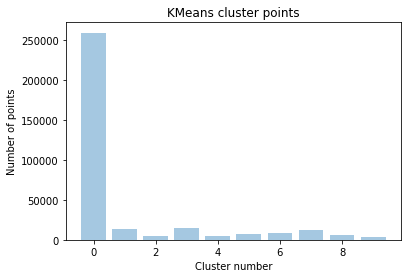

In [48]:
plt.bar([x for x in range(10)], df.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [10]:
for i in range(10):
    print("2 review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['Tfidf Clus Label']).groups[i][5]]['Reviews'])
    print('\n')
    print(df.iloc[df.groupby(['Tfidf Clus Label']).groups[i][10]]['Reviews'])
    print('\n')
    print(df.iloc[df.groupby(['Tfidf Clus Label']).groups[i][20]]['Reviews'])
    print('\n')
    print("_" * 70)

2 review of assigned to cluster  0
----------------------------------------------------------------------


NameError: ignored

##**Average Word to Vector**

In [65]:
#i=0
#list_of_sent=[]
#for sent in df['Cleaned Reviews'].values:
    #list_of_sent.append(sent.split())

In [66]:
#print(df['Cleaned Reviews'].values[0])
#print("*****************************************************************")
#print(list_of_sent[0])

In [67]:
list_of_sent_train=[]
for sent in df['Cleaned Reviews'].values:
    list_of_sent_train.append(sent.split())

In [68]:
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)

In [9]:
sent_vectors = [];
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100)
    cnt_words =0;
    for word in sent:
      try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
      except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape


NameError: ignored

In [73]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

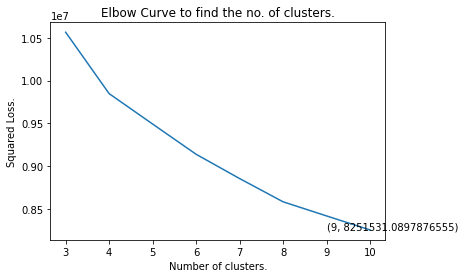

In [76]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors)      # Train Cluster
    squared_errors.append(kmeans.inertia_)                       # Appending the squared loss obtained in the list
optimal_clusters = np.argmin(squared_errors) + 2                 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()



In [77]:
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  8251531.0897876555


In [78]:
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [80]:
word_cluster_center[1:2]

array([[-0.34475608,  0.43014111,  0.35420272,  0.50033412,  0.2716206 ,
        -0.79993305,  0.52171255, -0.15563102,  1.08291532, -1.04491265,
        -1.27927898, -0.81018864,  0.95363479, -0.90840899, -0.79854914,
        -0.47896678,  0.34378979, -0.10495329,  0.34940733,  0.38107121,
         0.17791735,  0.47224467,  1.19876557,  0.41983917, -0.0331014 ,
         0.16971923,  0.52651661,  1.0180809 ,  0.73077625, -0.60460736,
         0.67860749, -0.00207429, -0.18680126, -0.10497589, -0.03785422,
        -1.24432006,  0.25827347, -0.04090682, -0.56018647, -0.03179059,
         0.39673533,  0.09474023, -0.31852638, -0.32665823, -0.02699975,
         0.29266967,  0.77146084, -0.42413177,  0.3569831 ,  0.88962294,
         0.20200298, -0.00932008,  0.11576854, -0.0780417 ,  0.17024592,
        -1.32129743,  0.51490748,  1.72824762,  0.01271875,  0.21173889,
         0.13895577, -0.34387708,  0.42213797, -0.26205913, -0.72206445,
        -0.74760724, -0.15739474, -0.33910081, -0.4

In [83]:
df = df
df['AVG-W2V Clus Label'] = model2.labels_
df.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    102671
1     37021
2     12961
3      6228
4     26308
5     38249
6     14691
7      9480
8     86726
Name: Reviews, dtype: int64

In [89]:
for i in range(2):                       #to get reviews for all clusters use 'optimal_clusters insread of 
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


It works good but it goes slow sometimes but its a very good phone I love it


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
Phone good just a little slow phone old but it's a great phone temporary right now. thank you for the great deal


the phone was great and in good condition. My Daughter is so happy the be a andriod user now !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


______________________________________________________________________


##**DBSCAN Clustering**

In [7]:
minPts = 2 * 100                                       #200 nearest neighbour
def lower_bound(nums, target):                         # return the number just greater than or equal to the number in the array.
    l, r = 0, len(nums) - 1
    while l <= r:                                      #search for binary
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):            # Returns the distance 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )                 # compute distances.
        if(len(dists) == 200 and dists[199] > dist):  # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist))         # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] 

In [8]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

NameError: ignored

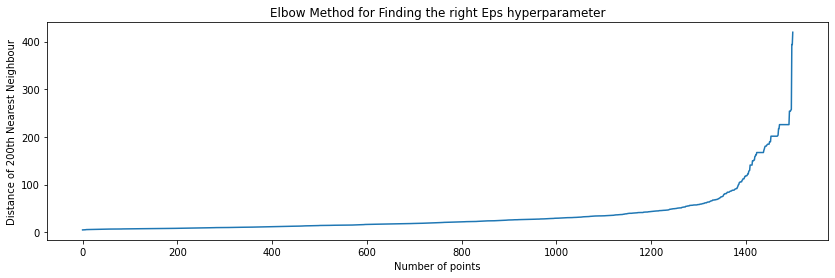

In [101]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [3]:
#based on the Elbow method the optimal value of the Eps seems to be 90
model = DBSCAN(eps = 90, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

NameError: ignored

In [ ]:
dfdbscan = df
dfdbscan['AVG-W2V Clus Label'] = model.labels_
dfdbscan.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

##**Hierarchial Clustering**

In [28]:

dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)           #5 clusters

NameError: ignored

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
aggdf = dfdbscan
aggdf['AVG-W2V Clus Label'] = cluster.labels_
aggdf.head(1)

In [ ]:
aggdf.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

In [ ]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdf.iloc[aggdf.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(aggdf.iloc[aggdf.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

###I was not able to run the program completely because my system was crashed, but to the best of my knowledge I write about the comparison of these three models.
K-means and DBSCAN both are unsupervised clustering. K-means clustering is the model for grouping the data based on the similarities and it is centroid-based machine learning algorithm. Euclidian Distance is used to measure the similarities in K-means model. Each cluster has one randomly centroid and the data which are close to each centroid are in that centroid cluster. DBSCAN it is the great way to detect outliers. DBSCAN clustering is density-based. There are two different categories of the points, core point and border point, which each data in dataset can be under one of these categories. Neighbor core point are in the same cluster and they are connected to one another. 
For K-means number of clusters must be specified, however for DBSCAN it is not necessary. Unlike K-means, DBSCAN can handle the outliers and can be used for high dimensional dataset. However, DBSCAN cannot be used for varying density data points.
For Hierarchical Clustering analyst should not specify number of the clusters, just can choose the cluster that has best format. In addition, it cannot handle big data well. The advantages of the Hierarchical clustering to K-means is data are selected randomly in each run for creating the clusters, so the results of running the algorithm several times might be different. For Hierarchical clustering analyst can interprets the dendrogram to choose clusters, while for K-means clustering number of K must be known at the initial point, and finally by trying different K, optimal K can be find. One of the best way toi find the optimal K as shown in the program is using the Elbow method it does not matter if the Bag of word model is used or TFIDF. 
